# Primeros pasos con OpenCV

## Requisitos
* [Python > 3.10](https://www.python.org/)
> Los módulos de Python necesarios pueden instalarse de dos modos:
> * Usando el gestor de paquetes del sistema operativo Linux
> * Usando el grator de paquetes propio de Pyhton
> 
> Es conveniente mezclar los dos métodos de instalación y además hay que considerar que se pueden instalar para un usuario concreto (dicho usuario hará la instalación) o para todos los usuarios (la instalación la hará el administrador del S.O.)
>  
> Si se decide usar el gestor de paquetes de Python, es necesario que en la instalación de Python se incluya el módulo **pip** y éste debe actualizarse periódicamente desde línea de comandos...
>> 
>        python -m pip install --upgrade pip
> 
> Se van a dar instrucciones de instalación de módulos mediante **pip**.
* [OpenCV > 4.7](https://opencv.org/)
>        pip install opencv-contrib-python
> OpenCV instalará automáticamente el módulo [NumPy](https://numpy.org/) que necesita para la representación matricial de las imágenes.
* [Matplotlib > 3.7](https://matplotlib.org/)
>        pip install matplotlib
* [Requests > 2.8](https://pypi.org/project/requests/)
>        pip install requests
> Requests será empleado para descargar algunas imágenes y videos con los que trabajar

Las funcionalidades de **OpenCV** se encuentran en el módulo de Python *cv2*

In [1]:
import cv2

OpenCV almacena las imágenes en matrices definidas en el módulo [*numpy*](https://numpy.org/doc/stable/reference/index.html#reference). Habitualmente se carga el módulo asignándole el alias *np*

In [2]:
import numpy as np

Aunque OpenCV puede mostrar imágenes, el módulo [*matplotlib*](https://matplotlib.org/stable/api/index) ofrece una gran versatilidad en la representación gráfica de imágenes, gráficas, etc.

Usaremos el submódulo *pyplot* que suele cargarse con el alias *plt*

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

Más adelante, para la correcta gestión de la reproducción de videos necesitaremos consultar el reloj del sistema mediante el módulo [**time**](https://docs.python.org/3/library/time.html)

In [4]:
import time

In [5]:
import requests
import os

Descargamos una imagen con la que *"jugar"*

In [6]:
open('baboon.jpg', 'wb').write(requests.get("https://github.com/opencv/opencv/raw/4.x/samples/data/baboon.jpg", allow_redirects=True).content)

179920

Para facilitar las futuras descargas definiré una función que incorporaré al notebook **cuia.ipynb**.

In [45]:
def download(path, filename=None, overwrite=False):
    if filename is None:
        nombre = os.path.basename(path)
    else:
        nombre = filename
    if overwrite or not os.path.exists(nombre):
        r = requests.get(path, allow_redirects=True)
        if r.status_code != 200:
            return(False)
        else:
            open(nombre, 'wb').write(r.content)
    return(True)

La lectura de una imagen de un fichero se realiza mediante la función [**imread**](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)

In [7]:
baboon = cv2.imread("baboon.jpg")

Para mostrar una imagen OpenCV dispone de la función [**imshow**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563)

El segundo argumento de dicha función es la imagen que se quiere mostrar. El primer argumento es el nombre de la ventana en la que se mostrará la imagen.

En caso de que no exista dicha ventana, esta se creará automáticamente. Si queremos crear la ventana explícitamente podemos usar la función [**namedWindow**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga5afdf8410934fd099df85c75b2e0888b)

Cualquier ventana creada es necesario destruirla al terminar de usarla mediante [**destroyWindow**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga851ccdd6961022d1d5b4c4f255dbab34) o [**destroyAllWindows**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga6b7fc1c1a8960438156912027b38f481)

Para no destruir la ventana hasta que el usuario haya terminado se introduce una pausa mediante [**waitKey**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7) que espera a que el usuario pulse una tecla. Si se omite el argumento se toma el valor por defecto 0 que representa una pausa indefinida. Cualquier otro valor numérico representa los milisegundos de espera. Si durante la pausa se pulsa una tecla entonces la función devuelve el código de la tecla pulsada. En caso contrario devuelve -1

**ALERTA:** Si se cierra la ventana (pulsando el botón X de cierre de ventanas) mientras se hace una pausa indefinida perdemos la opción de que se capture la pulsación de una tecla por lo que el proceso se quedará indefinidamente bloqueado. Para prevenir esta situación se puede comprobar periódicamente el estado de la ventana mediante [**getWindowProperty**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#gaaf9504b8f9cf19024d9d44a14e461656). 

In [8]:
cv2.imshow("Mandril", baboon)
while True:
    if cv2.waitKey(50) > 0:  #Pausa de 50 ms. Si durante la pause se pulsa cualquier tecla...
        cv2.destroyWindow("Mandril")   #...se cierra la ventana.
        break
    if cv2.getWindowProperty("Mandril", cv2.WND_PROP_VISIBLE) < 1: #Si la ventana ya no es visible (fue cerrada), salimos del bucle
        break

Podemos definir una función que presente dicha funcionalidad para que sea más cómodo usarla en el futuro.

In [9]:
# Esta función será incorporada al notebook cuia.ipynb para poder ser usada en el futuro
def popup(titulo, imagen):
    cv2.imshow(titulo, imagen)
    while True:
        if cv2.waitKey(10) > 0:
            cv2.destroyWindow(titulo)
            break
        elif cv2.getWindowProperty(titulo, cv2.WND_PROP_VISIBLE) < 1:
            break

In [10]:
popup("MANDRIL", baboon)

Para que las imágenes sean mostradas incrustadas en este documento podemos usar la función [**imshow**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) de  **matplotlib** aunque comprobaremos que los colores han cambiado...

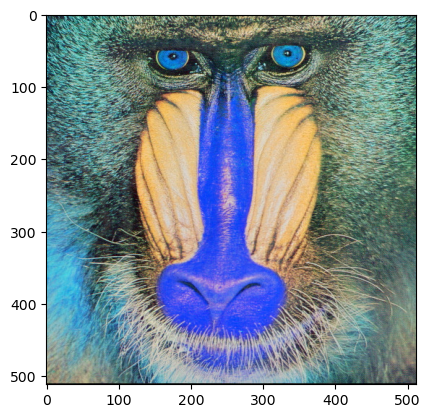

In [11]:
plt.imshow(baboon)

La diferencia en los colores se debe a que matplotlib espera que la imagen use el espacio de color RGB (en ese orden) mientras que OpenCV usa el orden BGR (Esto es debido a que cuando se creó OpenCV no estaba ampliamente aceptado el orden RGB sino que más bien era BGR el ordenamiento más popular).
OpenCV ofrece la posibilidad de convertir el espacio de color de una imagen entre RGB, BGR y otros muchos espacios de color adicionales mediante la función [**cvtColor**](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab)

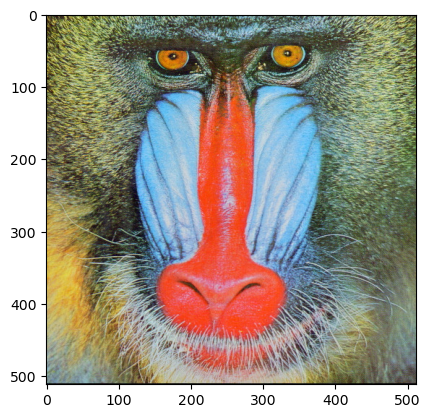

In [12]:
plt.imshow( cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB) )

Para hacer más cómoda la representación de imágenes incrustadas en los documentos definiremos una función que incluiremos en el notebook **cuia.ipynb**.

In [13]:
# Esta función será incorporada al notebook cuia.ipynb para poder ser usada en el futuro
def plot(image):
    if len(image.shape)==2:
        h, w = image.shape
        c = 1
    else:
        h, w, c = image.shape
    px = 1/plt.rcParams['figure.dpi']  
    plt.subplots(figsize=(h*px, w*px), layout='tight')
    plt.axis('off')
    if c==4:
        plt.imshow( cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA) )
    elif c==1:
        plt.imshow( image, cmap='gray' )
    else:
        plt.imshow( cv2.cvtColor(image, cv2.COLOR_BGR2RGB) )

OpenCV es también capaz de extraer los frames individuales de una secuencia de video mediante [**VideoCapture**](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html)

El argumento puede ser la ruta de un fichero de video, la ruta de un dispositivo (ej. /dev/video0), la url de un stream de video o bien un número entero que identifique la cámara (numeradas empezando en 0 para la primera) de la que se obtendrán los frames.

El resultado será un objeto que nos permitirá trabajar con el video. El recurso ha de ser liberado tras su uso mediante una llamada al método [**release**](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html#afb4ab689e553ba2c8f0fec41b9344ae6)

Inicialmente emplearemos los métodos [**isOpened**](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html#a9d2ca36789e7fcfe7a7be3b328038585) para comprobar si se pudo acceder al video, y [**read**](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html#a473055e77dd7faa4d26d686226b292c1) para obtener el siguiente frame.

Empezaremos descargando un video con el que trabajar.

In [48]:
download("https://ccia.ugr.es/~bailon/clases/CUIA/opencv/rubik.mp4")

True

La reproducción del video puede hacerse mediante un bucle que extraiga frames del video y los muestre en una ventana hasta que el usuario pulse una tecla (método [**waitKey**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7)), la ventana haya sido cerrada (lo cual es comprobado mediante el método [**getWindowProperty**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#gaaf9504b8f9cf19024d9d44a14e461656)) o no se puedan obtener más frames (en cuyo caso el método [read](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html#a473055e77dd7faa4d26d686226b292c1) devuelve el valor lógico *False*).

El tiempo de espera indicado en [**waitKey**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7) debe ser suficientemente pequeño para que no se vea ralentizada la reproducción del video. (¡Ojo! Un argumento 0 indica una espera indefinida)

In [15]:
video = cv2.VideoCapture("rubik.mp4")
if video.isOpened():
    cv2.namedWindow("RUBIK")
    while True:
        ret, frame = video.read()
        if not ret or cv2.waitKey(20)>0 or cv2.getWindowProperty("RUBIK", cv2.WND_PROP_VISIBLE) < 1:
            break
        cv2.imshow("RUBIK", frame)
    video.release()
cv2.destroyAllWindows()

Aunque [Leo](https://www.speedsolving.com/wiki/index.php/Leo_Borromeo) es un magnífico *cuber*, no es tan rápido como parece. Podemos apreciar que el video no se reproduce a la velocidad adecuada ya que el ritmo al que se muestran los frames no tiene en cuenta la velocidad de proceso del ordenador.

Para conocer la velocidad a la que debería reproducirse el video (y otra mucha información) se puede emplear el método [**get**](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html#aa6480e6972ef4c00d74814ec841a2939) indicando como argumento una constante que identifica la propiedad que se quiere conocer ([lista de constantes - propiedades](https://docs.opencv.org/4.x/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d)). Algunas de estas propiedades podrás ser modificadas mediante el método [**set**](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html#a8c6d8c2d37505b5ca61ffd4bb54e9a7c).

La clave para la correcta reproducción de un video es que el ritmo de presentación de frames sea lo más cercano posible al valor de FPS (frames por segundo) original del video. En ordenadores rápidos esto supone hacer cierta pausa entre la presentación de frames consecutivos. En un ordenador lento o con mucha carga de trabajo será necesario descartar algunos frames (no mostrarlos) para conseguir un ritmo de presentación adecuado a costa de que se pueda apreciar una reproducción menos "suave".

La ventana de tiempo durante la que un frame ha de ser mostrado es de (1/FPS) segundos. Es decir, el frame n-ésimo (contando desde 0) debe mostrarse desde el instante (n/FPS) hasta el instante ((n+1)/FPS). Ambos instantes, expresados en segundos desde el inicio de la reproducción, marcan el intervalo correcto en que se puede mostrar el frame. Si el reloj marca que estamos por debajo del límite inferior significa que debemos hacer una pausa hasta que sea el momento oportuno. Si el reloj marca que ya hemos superado el límite superior entonces no podemos mostrar el frame ya que se trata de un frame "antiguo" por lo que debemos descartarlo y "saltar" hasta el frame adecuado.

In [ ]:
def reproducir(ventana, video):
    FPS = video.get(cv2.CAP_PROP_FPS)
    print("El video debería reproducirse a ", FPS, " FPS")
    numframes = video.get(cv2.CAP_PROP_FRAME_COUNT)
    cv2.namedWindow(ventana)
    c = 0                   #Iniciamos un contador para saber por qué frame vamos...
    inicio = time.time()    #... y tomamos una marca del momento en que se empieza a reproducir el video
    while True:
        ret, frame = video.read()
        if not ret:
            break
        c = c + 1
        inicioframe = inicio + c / FPS #Límite inferior del intervalo en que se puede mostrar el frame
        finframe = inicio + (c+1) / FPS #Límite superior
        ahora = time.time()                                                 #Consultamos lo que marca el reloj
        if ahora <= inicioframe:                                            #Si aún no ha llegado el momento de mostrar el frame...
            if cv2.waitKey(int((inicioframe-ahora)*1000)) == 27\
               or cv2.getWindowProperty(ventana, cv2.WND_PROP_VISIBLE) < 1: #...esperamos los milisegundos que faltan hasta ese momento
                break                                                       #O interrumpimos la reproducción si el usuario pulsa ESC (código 27)
            cv2.imshow(ventana, frame)                                      #...y lo mostramos
        elif ahora < finframe:                                              #Si vamos bien de tiempo...
            cv2.imshow(ventana, frame)                                      #...lo mostramos sin esperar
        else:                                                               #Si ya pasó el momento hay que descartar el frame y saltar al que corresponda
            numframecorrecto = int((ahora - inicio) * FPS)                  # Calculamos el número de frame que debería mostrarse ahora
            video.set(cv2.CAP_PROP_POS_FRAMES, numframecorrecto)            #Y saltamos a ese frame para que sea mostrado en la siguiente vuelta del bucle
            print("Saltamos ", numframecorrecto - c, " frames")
    print("El ritmo medio de reproducción ha sido ", c / (time.time() - inicio), "FPS")
    cv2.destroyWindow(ventana)
    
video = cv2.VideoCapture("rubik.mp4")
if video.isOpened():
    reproducir("RUBIK", video)
    video.release()
else:
    print("Error accediendo al video")

Para obtener las imágenes en vivo de una cámara conectada al ordenador podemos emplear un número entero (comenzando en 0) para identificarlas. Para emplear la primera cámara conectada usamos 0 como argumento a la llamada a [**VideoCapture**](https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html#aabce0d83aa0da9af802455e8cf5fd181)).

**ATENCIÓN:** En sistemas Linux se puede identificar una cámara por la ruta del dispositivo (ej. /dev/video0)

En adelante se usará la cámara indicada en la variable **myCam**. Modifique el valor de la variable para adecuarlo a su sistema.

In [17]:
myCam = 0

El segundo argumento indica el backend que se empleará para el acceso a la cámara. El valor por defecto *cv2.CAP_ANY* realiza una detección automática del backend apropiado. 

**ATENCIÓN:** En algunos sistemas Windows esta detección puede ser muy lenta (del orden de minutos). En esos casos es mejor especificar directamente el backend a usar.

Para ver los *backends* disponibles para nuestra webcam y el tiempo que necesita cada uno de ellos para iniciar podemos usar las funciones [getCameraBackends](https://docs.opencv.org/4.x/de/db1/group__videoio__registry.html#gaf6e7163ade0d35b946c3ccccaf504e3e) y [getBackendName](https://docs.opencv.org/4.x/de/db1/group__videoio__registry.html#ga6723e68832186e20bd44cd3c2b0d8c60).

El siguiente *script* lista los *backends* disponibles y los tiempos que necesitaron para iniciarse y guarda en la variable **bestCap** el más rápido.

In [ ]:
print("Backends disponibles para el acceso a la cámara 0 (puede tardar más de 1 minuto)")
backends = cv2.videoio_registry.getCameraBackends()
bestCap = 0
bestTime = 999
for b in backends:
    start = time.time()
    cam = cv2.VideoCapture(myCam, b)
    end = time.time()
    if cam.isOpened():
        print(f'cv2.CAP_{cv2.videoio_registry.getBackendName(b):s} inició en {end-start:.2f} segundos')
        if end-start < bestTime:
            bestTime = end-start
            bestCap = b
        cam.release()
print(f'El más rápido fue cv2.CAP_{cv2.videoio_registry.getBackendName(bestCap):s}')

Para poder reutilizar este proceso en el futuro definiré una función **bestBackend** que será incluída en el notebook **cuia.ipynb**.

In [19]:
# Esta función será incorporada al notebook cuia.ipynb para poder ser usada en el futuro
def bestBackend(camid):
    backends = cv2.videoio_registry.getCameraBackends()
    bestCap = 0
    bestTime = 999
    for b in backends:
        start = time.time()
        cam = cv2.VideoCapture(camid, b)
        end = time.time()
        if cam.isOpened():
            if end-start < bestTime:
                bestTime = end-start
                bestCap = b
            cam.release()
    return bestCap

A diferencia de lo que ocurre en la reproducción de un fichero de video, las llamadas a **read** obtienen el frame actual de la cámara, es decir, no será necesario gestionar pausas ni descartado de frames para ver el video a la velocidad correcta.

In [20]:
cv2.namedWindow("WEBCAM")
webcam = cv2.VideoCapture(myCam,bestCap)
if webcam.isOpened():
    while True:
        ret, frame = webcam.read()
        if not ret or cv2.waitKey(20)==27: #Detenemos la reproducción pulsando ESC
            break
        elif cv2.getWindowProperty("WEBCAM", cv2.WND_PROP_VISIBLE) < 1: #Detenemos también si se cerró la ventana
            break
            
        #Aquí es donde podemos procesar la imagen antes de mostrarla
        
        cv2.imshow("WEBCAM", frame)
webcam.release()
cv2.destroyAllWindows()

El momento en que se ha leído un frame pero aún no ha sido mostrado es el instante en que se puede realizar un procesado de los frames. Podemos definir una función que simplifique este proceso y permita indicar una función opcional para el procesado de los frames. Dicha función de procesado de frames deberá aceptar como único argumento la imagen en la que se aplicará.

In [21]:
#El argumento proceso indica la función que se aplicará a cada frame antes de ser mostrado
def playWebcam(titulo, webcam, proceso=None):
    cv2.namedWindow(titulo)
    if webcam.isOpened():
        while True:
            ret, frame = webcam.read()
            if not ret or cv2.waitKey(20)==27: #Detenemos la reproducción pulsando ESC
                break
            elif cv2.getWindowProperty(titulo, cv2.WND_PROP_VISIBLE) < 1: #Detenemos también si se cerró la ventana
                break

            if proceso != None:
                frame = proceso(frame) #Aquí aplicamos el procesado de frames en caso de que así se hubiera indicado

            cv2.imshow(titulo, frame)
    cv2.destroyWindow(titulo)

Por ejemplo, podemos reproducir los frames de la webcam aplicando un filtro de desenfoque gaussiano mediante el método [**GaussianBlur**](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1). Para ello defino una función cun un único argumento que pueda emplear con la función **playWebcam**.

In [22]:
def desenfoque(frame):
    return cv2.GaussianBlur(frame, (13,13), 5)

In [23]:
webcam = cv2.VideoCapture(myCam,bestCap)
playWebcam("CAMARA", webcam, desenfoque)
webcam.release()

El acceso a los frames servidor por un stream de video (por ej. una cámara ip, se hace indicando la url del stream, por ejemplo [http://166.165.35.37/mjpg/video.mjpg](http://166.165.35.37/mjpg/video.mjpg).

In [24]:
cv2.namedWindow("STREAM")
ipcam = cv2.VideoCapture("http://166.165.35.37/mjpg/video.mjpg")
if ipcam.isOpened():
    while True:
        ret, frame = ipcam.read()
        if not ret or cv2.waitKey(20)==27: #Detenemos la reproducción pulsando ESC
            break
        elif cv2.getWindowProperty("STREAM", cv2.WND_PROP_VISIBLE) < 1: #Detenemos también si se cerró la ventana
            break
            
        #Aquí es donde podemos procesar la imagen antes de mostrarla
        
        cv2.imshow("STREAM", frame)
ipcam.release()
cv2.destroyAllWindows()

Para acceder de un modo uniforme y simultáneo a varias fuentes de video y procesar las imágenes recibidas podemos definir una clase que aúne lo visto anteriormente y que será incluída en el notebook **cuia.ipynb**.

In [25]:
# Esta clase será incorporada al notebook cuia.ipynb para poder ser usada en el futuro
class myVideo:
    def __init__(self, source, backend=cv2.CAP_ANY):
        self.loop = False      #Para indicar si el video reiniciará al terminar
        self.process = None    #Para indicar la función opcional de procesado de frames
        if isinstance(source, str):
            if os.path.exists(source):
                self._cap = cv2.VideoCapture(source)
                self._camera = False
                self._nextFrame = 0
                self._startTime = time.time()
                self._fps = self._cap.get(cv2.CAP_PROP_FPS)
                self._numFrames = self._cap.get(cv2.CAP_PROP_FRAME_COUNT)
                self._currentFrame = None
            else:
                self._cap = cv2.VideoCapture(source)
                self._camera = True #IP Camera
        elif isinstance(source, int):
            self._cap = cv2.VideoCapture(source, backend)
            self._camera = True
            
    def __del__(self):
        self._cap.release()
        
    def release(self):
        self._cap.release()
        del self
        
    def isOpened(self):
        return self._cap.isOpened()
    
    def read(self):
        if self._camera:
            ret, frame = self._cap.read()
            if ret and self.process != None:
                frame = self.process(frame)
            return(ret, frame)
        else:
            nextFrameStart = self._startTime + self._nextFrame / self._fps
            nextFrameEnd = self._startTime + (self._nextFrame + 1) / self._fps
            now = time.time()
            if now <= nextFrameStart:
                return (True, self._currentFrame)
            else:
                if now < nextFrameEnd:
                    correctFrame = self._nextFrame
                else:
                    correctFrame = int((now - self._startTime) * self._fps)

                if self.loop:
                    correctFrame = correctFrame % self._numFrames
                elif correctFrame >= self._numFrames:
                    return (False, None)
                
                if correctFrame != self._nextFrame:
                    self._cap.set(cv2.CAP_PROP_POS_FRAMES, correctFrame)
                
                ret, frame = self._cap.read()
                if ret:
                    self._currentFrame = frame
                    self._nextFrame = correctFrame + 1
                    if self.loop:
                        self._nextFrame = self._nextFrame % self._numFrames
                        
                    if self.process != None:
                        frame = self.process(frame)
                return (ret, frame)
            
    def get(self, prop):
        return(self._cap.get(prop))
    
    def set(self, prop, value):
        if prop == cv2.CAP_PROP_POS_FRAMES:
            self._nextFrame = value
        return(self._cap.set(prop, value))
    
    def play(self, titulo, key=27):
        cv2.namedWindow(titulo)
        if self._cap.isOpened():
            while True:
                ret, frame = self.read()
                if not ret or cv2.waitKey(20)==key: 
                    break
                elif cv2.getWindowProperty(titulo, cv2.WND_PROP_VISIBLE) < 1: 
                    break
                if frame is not None:
                    cv2.imshow(titulo, frame)
        cv2.destroyWindow(titulo)

In [26]:
cv2.namedWindow("WEBCAM")
cv2.namedWindow("VIDEO")
cv2.namedWindow("IPCAMERA")
video = myVideo("rubik.mp4")
video.loop = True
webcam = myVideo(myCam,bestCap)
video.process = desenfoque
ipcamera = myVideo("http://166.165.35.37/mjpg/video.mjpg")

if webcam.isOpened() and video.isOpened() and ipcamera.isOpened():
    while True:
        ret, frame = webcam.read()
        if not ret or cv2.getWindowProperty("WEBCAM", cv2.WND_PROP_VISIBLE) < 1: #Detenemos si se cerró la ventana
            break
        cv2.imshow("WEBCAM", frame)

        ret, frame = video.read()
        if not ret or cv2.getWindowProperty("VIDEO", cv2.WND_PROP_VISIBLE) < 1: #Detenemos si se cerró la ventana
            break
        cv2.imshow("VIDEO", frame)

        ret, frame = ipcamera.read()
        if not ret or cv2.getWindowProperty("IPCAMERA", cv2.WND_PROP_VISIBLE) < 1: #Detenemos si se cerró la ventana
            break
        cv2.imshow("IPCAMERA", frame)
        
        if cv2.waitKey(20)==27: #Detenemos la reproducción pulsando ESC
            break
else:
    print("No se pudo abrir")
del webcam
del video
del ipcamera
cv2.destroyAllWindows()